In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diseases = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass", 
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema", 
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia"
]

# AUC scores for DenseNet121
densenet_tta = [0.770, 0.875, 0.828, 0.698, 0.809, 0.751, 0.727, 0.856, 0.746, 0.836, 0.881, 0.816, 0.761, 0.854]
densenet_no_tta = [0.506, 0.441, 0.577, 0.565, 0.509, 0.539, 0.537, 0.560, 0.564, 0.583, 0.593, 0.486, 0.522, 0.343]

# AUC scores for Swin-SimMIM
swin_tta = [0.791, 0.905, 0.847, 0.720, 0.846, 0.767, 0.744, 0.878, 0.771, 0.861, 0.931, 0.852, 0.806, 0.916]
swin_no_tta = [0.774, 0.890, 0.829, 0.704, 0.829, 0.757, 0.706, 0.861, 0.753, 0.842, 0.898, 0.831, 0.790, 0.914]

/tmp/ipykernel_1777767/582476371.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(diseases, rotation=45, ha="right")


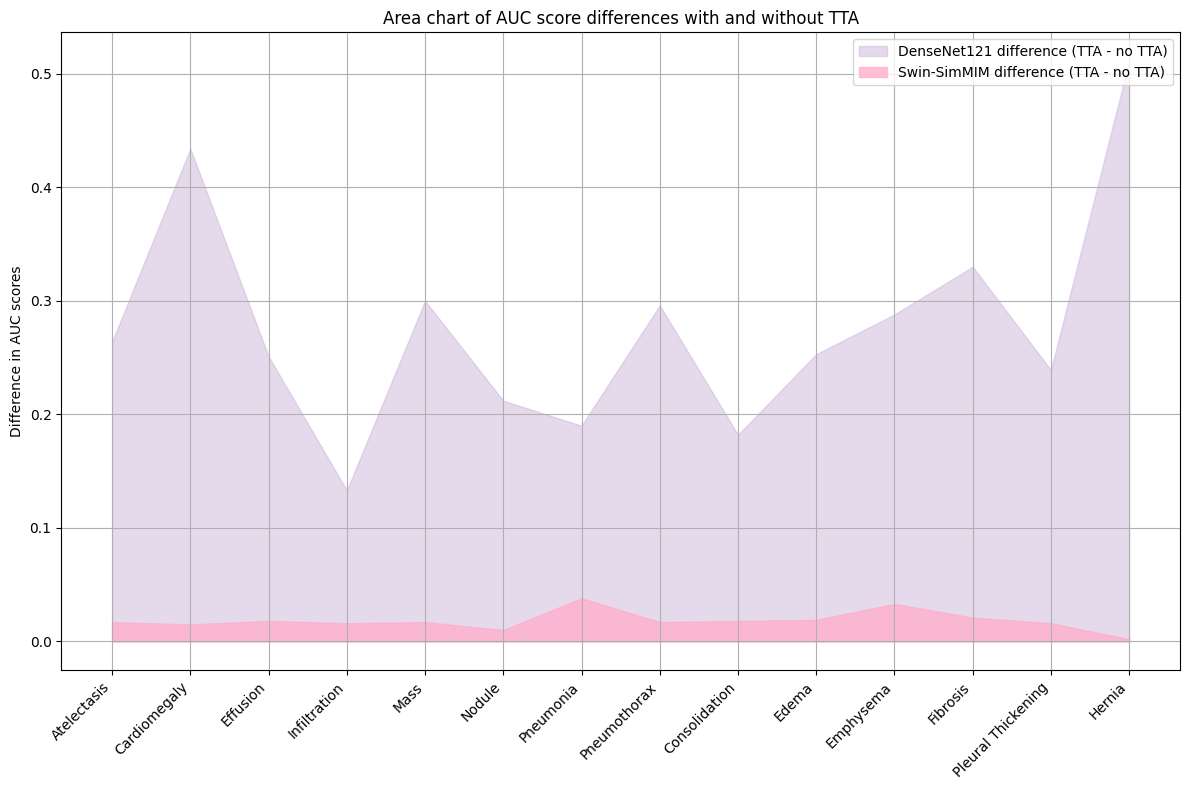

In [19]:
densenet_diff = np.array(densenet_tta) - np.array(densenet_no_tta)
swin_diff = np.array(swin_tta) - np.array(swin_no_tta)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Regular area chart
ax.fill_between(diseases, densenet_diff, color='#CDB4DB', alpha=0.5, label='DenseNet121 difference (TTA - no TTA)')

ax.fill_between(diseases, swin_diff, color='#FFAFCC', alpha=0.8, label='Swin-SimMIM difference (TTA - no TTA)')
ax.set_title('Area chart of AUC score differences with and without TTA')
ax.set_ylabel('Difference in AUC scores')
ax.set_xticklabels(diseases, rotation=45, ha="right")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.savefig("difference-auc-scores.png")